# AB Testing

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Simulate data
# Suppose we have 1000 users in total
n_users = 1000

# Assume 50% users see A and 50% see B
n_A = n_users // 2
n_B = n_users - n_A

# Simulating conversions:
# Let's say the conversion rate for A is 10% and for B is 15%
conversion_rate_A = 0.10
conversion_rate_B = 0.15

# Generate binary data for conversions
data_A = np.random.binomial(1, conversion_rate_A, n_A)
data_B = np.random.binomial(1, conversion_rate_B, n_B)

# Create a DataFrame
data = pd.DataFrame(
    {
        "variant": ["A"] * n_A + ["B"] * n_B,
        "converted": np.concatenate([data_A, data_B]),
    }
)

# Display the first few rows
print(data.head())

  variant  converted
0       A          0
1       A          1
2       A          0
3       A          0
4       A          0


In [2]:
# Calculate conversion rates
conversion_counts = data.groupby("variant")["converted"].agg(["count", "sum"])
conversion_counts["conversion_rate"] = (
    conversion_counts["sum"] / conversion_counts["count"]
)

# Display conversion rates
print(conversion_counts)

# Calculate the statistical significance (using Chi-squared test)
chi2, p_value, _, _ = stats.chi2_contingency(
    [
        [
            conversion_counts.loc["A", "sum"],
            conversion_counts.loc["A", "count"] - conversion_counts.loc["A", "sum"],
        ],
        [
            conversion_counts.loc["B", "sum"],
            conversion_counts.loc["B", "count"] - conversion_counts.loc["B", "sum"],
        ],
    ]
)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p_value}")

# Interpret the p-value
alpha = 0.05  # 5% significance level
if p_value < alpha:
    print(
        "We reject the null hypothesis - there is a significant difference between A and B."
    )
else:
    print(
        "We fail to reject the null hypothesis - no significant difference between A and B."
    )

         count  sum  conversion_rate
variant                             
A          500   55             0.11
B          500   70             0.14
Chi-squared statistic: 1.7920000000000003
P-value: 0.18068267265759735
We fail to reject the null hypothesis - no significant difference between A and B.


In [22]:
conversion_counts

,count,sum,conversion_rate
variant,,,
A,500,55,0.11
B,500,70,0.14


In [21]:
[
    [
        conversion_counts.loc["A", "sum"],
        conversion_counts.loc["A", "count"] - conversion_counts.loc["A", "sum"],
    ],
    [
        conversion_counts.loc["B", "sum"],
        conversion_counts.loc["B", "count"] - conversion_counts.loc["B", "sum"],
    ],
]

[[55, 445], [70, 430]]

In [19]:
conversion_counts.loc["A", :]

count              500.00
sum                 55.00
conversion_rate      0.11
Name: A, dtype: float64

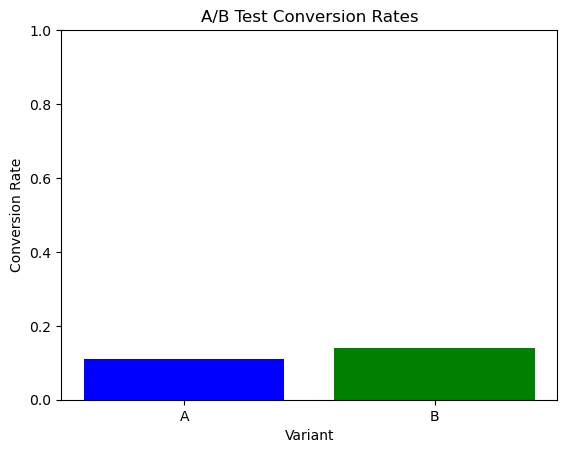

In [3]:
# Plot the conversion rates
plt.bar(
    conversion_counts.index,
    conversion_counts["conversion_rate"],
    color=["blue", "green"],
)
plt.title("A/B Test Conversion Rates")
plt.xlabel("Variant")
plt.ylabel("Conversion Rate")
plt.ylim(0, 1)
plt.show()